# Lecture 5: Chemical Bonding and Numerical Integration

The covalent bond is a cornerstone in the chemical sciences, dictating the chemical and physical properties of organic matter and also playing an important role in inorganic and solid-state/materials chemistry. The covalent bond is a quantum mechanical phenomenon, where electrons in atomic orbitals are shared between atoms, causing these atomic orbitals to hybridize and form molecular orbitals. The hybridization of atomic orbitals is primarily governed by the energetic similarity of the atomic orbitals involved and their spatial proximity and orientation. In quantum chemistry, the latter is quantified using the overlap integral, which takes the following form:

$$
S = \int_0^{\infty} \int_0^{\pi} \int_0^{2\pi} \psi_i^*(r, \theta, \phi) \psi_j(r, \theta, \phi) r^2 \sin(\theta) dr d\theta d\phi
$$

Here, $\psi_i$ and $\psi_j$ are the atomic orbitals of atoms $i$ and $j$, respectively. These atomic orbitals are written in spherical coordinates, where the volume element of integration is $r^2 \sin(\theta) dr d\theta d\phi$. We will come back to this, but first, let us discuss what an integral really is.

### What is an Integral?

The formal definition of an (Riemann) integral is the limit of a sum of areas of rectangles under a curve. The integral of a function $f(x)$ over an interval $[a, b]$ is given by:

$$
\int_a^b f(x) dx = \lim_{n \to \infty} \sum_{i=1}^{n} f(x_i) \Delta x
$$

In other words, an integral is a sum with really small increments (as small as possible). Therefore, calculating an integral numerically amounts to computing the area of a series of rectangles along $x$, where the height of the rectangle is the function $y$ value at that point. There are several methods to achieve an accurate value of the integral with the fewest number of computations, such as the trapezoidal rule, Simpson's rule, and Gaussian quadrature. In this lecture, we will focus on the Riemann sum when we write our own integratrion codes and then move on to the trapezoidal rule, which is implemented in scipy and numpy.

### Let Us Put This To the Test

Let's consider the function $f(x) = x^2$ over the interval $[0, 1]$. The integral of this function is:

$$
\int_0^1 x^2 dx = (1/3) x^3 \Big|_0^1 = 1/3
$$

Now, let's calculate this integral numerically using a Riemann sum with 10, 100, and 1000 rectangles.

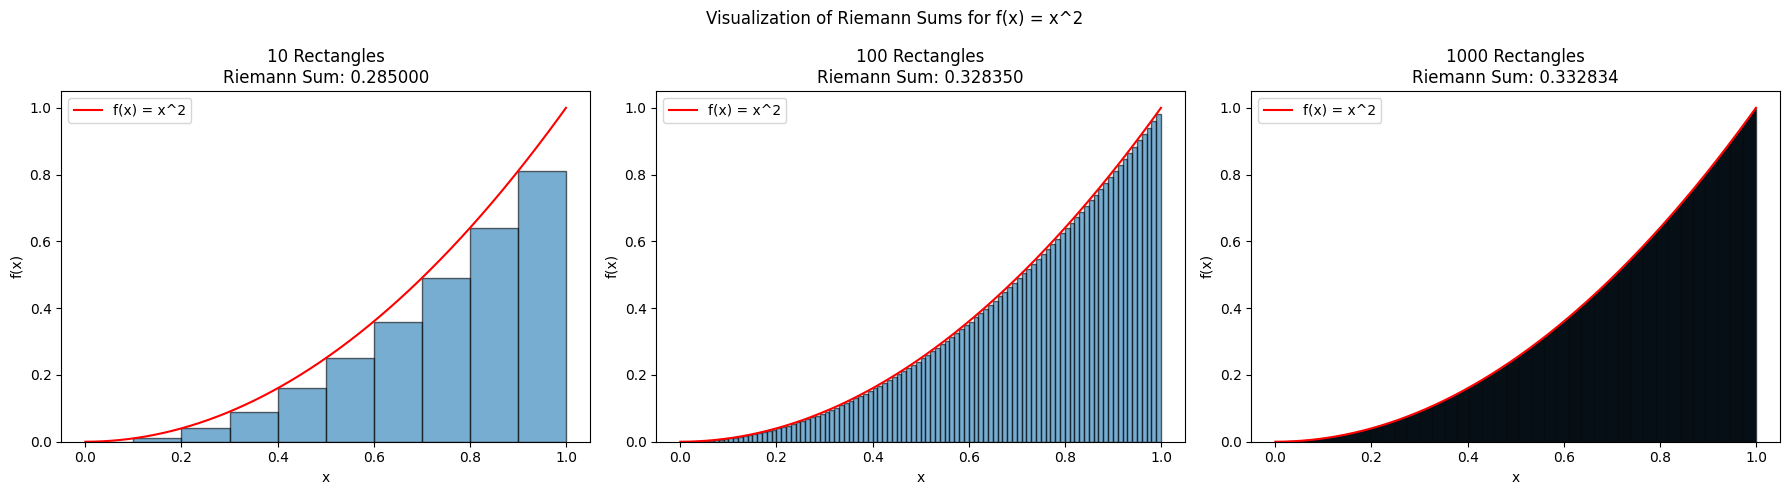

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) = x^2
def f(x):
    return x**2

# Define the Riemann sum function
def riemann_sum(f, a, b, n):
    x = np.linspace(a, b, n, endpoint=False)
    dx = (b - a) / n
    return np.sum(f(x) * dx), x, dx

# Interval [0, 1]
a = 0
b = 1

# Number of rectangles
n_values = [10, 100, 1000]

# Prepare the plot
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Visualization of Riemann Sums for f(x) = x^2')

# Calculate and plot the Riemann sums
for i, n in enumerate(n_values):
    riemann_sum_value, x, dx = riemann_sum(f, a, b, n)
    axs[i].bar(x, f(x), width=dx, align='edge', alpha=0.6, edgecolor='black')
    axs[i].plot(np.linspace(a, b, 1000), f(np.linspace(a, b, 1000)), 'r-', label='f(x) = x^2')
    axs[i].set_title(f'{n} Rectangles\nRiemann Sum: {riemann_sum_value:.6f}')
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('f(x)')
    axs[i].legend()

plt.tight_layout()
plt.show()

So easy a caveman can do it!

### Let Us Do Another Example

Now, let's consider the function $f(x) = \sin(x)$ over the interval $[-\pi, \pi]$. Let us calculate this integral numerically using the trapezoidal rule, which sums a series of trapezoids under the curve, instead of rectangles. The trapezoidal rule is given by:

$$
\int_a^b f(x) dx \approx \frac{h}{2} \left[ f(a) + 2 \sum_{i=1}^{n-1} f(x_i) + f(b) \right]
$$

where $h = (b - a) / n$ is the width of each trapezoid. Let's calculate this integral numerically using the Riemann sum with 10, 100, and 1000 rectangles and the trapezoidal rule with 10, 100, and 1000 trapezoids.

```{admonition} Wait!
:class: warning
Before we proceed, can you guess the value of this integral? What can you say about the symmetry of the sine function around the center of the interval of integration?
```

OK, now that we have a guess, let's calculate the integral and compare the results.

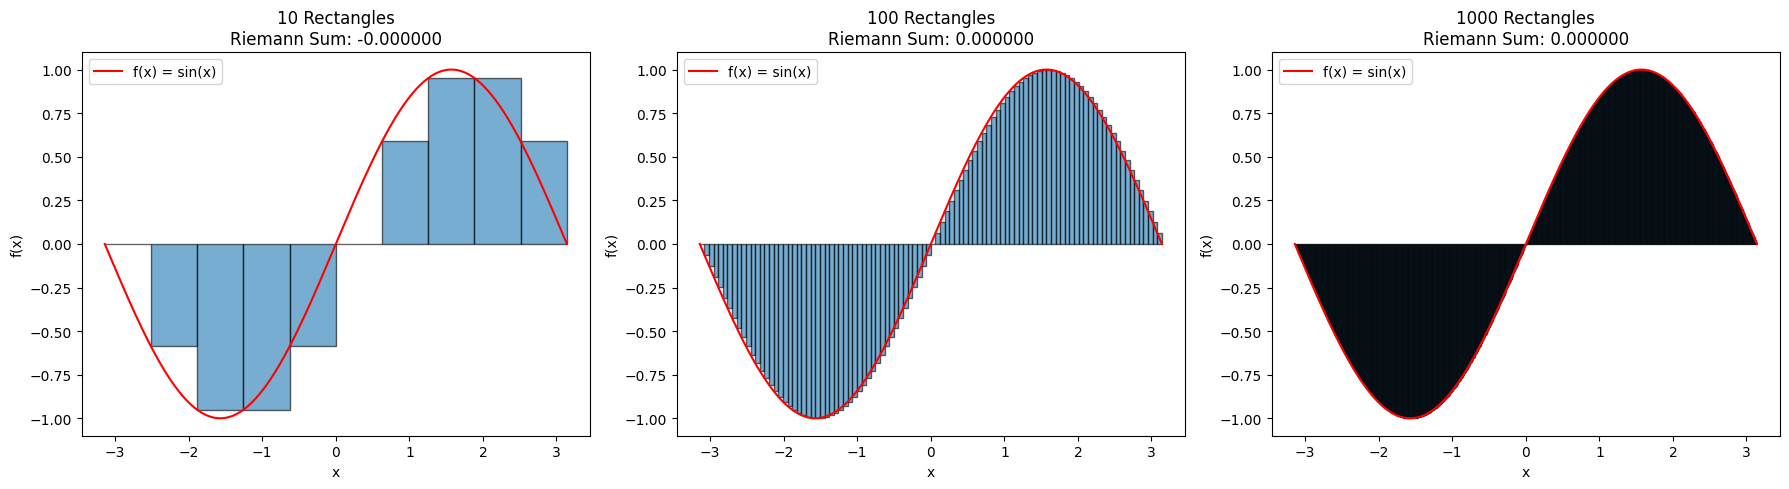

In [2]:
# Interval [-pi, pi]
a = -np.pi
b = np.pi

# Define the function f(x) = sin(x)
def f(x):
    return np.sin(x)

# Prepare the plot
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Calculate and plot the Riemann sums
for i, n in enumerate(n_values):
    riemann_sum_value, x, dx = riemann_sum(f, a, b, n)
    axs[i].bar(x, f(x), width=dx, align='edge', alpha=0.6, edgecolor='black')
    axs[i].plot(np.linspace(a, b, 1000), f(np.linspace(a, b, 1000)), 'r-', label='f(x) = sin(x)')
    axs[i].set_title(f'{n} Rectangles\nRiemann Sum: {riemann_sum_value:.6f}')
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('f(x)')
    axs[i].legend()

plt.tight_layout()
plt.show()

```{admonition} Note
:class: note
Before integrating, always check the symmetry of your function about the center of the integration range. If it is symmetric like the sine function, then you can get away without having to compute the integral. This type of intuition can prove really useful in the chemical sciences.
```

### Calculating the Overlap Integral of Two H 1s Orbitals

Now, let's calculate the overlap integral of two hydrogen 1s orbitals, which are given by:

$$
\psi_{1s} = \left( \frac{1}{\pi a_0^3} \right)^{1/2} e^{-r/a_0}
$$

where $a_0$ is the Bohr radius, which is approximately 0.529 Å. So, it turns out this integral is pretty tough to solve in spherical coordinates, but we can convert it to Cartesian coordinates and use numerical integration to solve it. Recall that $r$ is related to $x$, $y$, and $z$ as:

$$
r = \sqrt{x^2 + y^2 + z^2}
$$

Therefore, we can rewrite the hydrogen 1s orbital in Cartesian coordinates as:

$$
\psi_{1s} = \left( \frac{1}{\pi a_0^3} \right)^{1/2} e^{-\sqrt{x^2 + y^2 + z^2}/a_0}
$$

To determine the total overlap of the hydrogen 1s orbitals of two electrons, we need to integrate over all possible space where those orbitals can overlap, which is from $-\infty$ to $\infty$ in all three dimensions. For two hydrogen atoms, one at the origin and the other at a distance $a_0$ along the $x$-axis, the overlap integral is given by:

$$
S = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \psi_{1s}^*(x, y, z) \psi_{1s}(x - a_0, y, z) dx dy dz
$$

OK, so what do we have to do to solve this integral. First, we need to define the $x$, $y$, and $z$ ranges over which we will integrate. Then, we need to define the function we are integrating. Finally, we need to integrate the function over the ranges we defined. Let's do this now.

In [3]:
import numpy as np

# Constants
a0 = 1.0  # Bohr radius
N = 100  # Number of points in each dimension
x_min, x_max = 0, 7 * a0  # Limits for x
y_min, y_max = 0, 7 * a0  # Limits for y
z_min, z_max = 0, 7 * a0  # Limits for z

# Create grid points
x = np.linspace(x_min, x_max, N)
y = np.linspace(y_min, y_max, N)
z = np.linspace(z_min, z_max, N)

# Calculate step sizes
dx = (x_max - x_min) / N
dy = (y_max - y_min) / N
dz = (z_max - z_min) / N

# Initialize the sum for the Riemann sum
S_sum = 0.0

# Perform the Riemann sum
for i in range(N):
    for j in range(N):
        for k in range(N):
            r1 = np.sqrt((x[i] + a0 / 2) ** 2 + y[j] ** 2 + z[k] ** 2)
            r2 = np.sqrt((x[i] - a0 / 2) ** 2 + y[j] ** 2 + z[k] ** 2)
            integrand_value = np.exp(-(r1 + r2) / a0)
            S_sum += integrand_value * dx * dy * dz

# Apply the normalization factor
normalization_factor = 8 / (np.pi * a0**3)
S = normalization_factor * S_sum

# Output the result
print(f"The value of the overlap integral S using the Riemann sum is approximately: {S:.6f}")

The value of the overlap integral S using the Riemann sum is approximately: 0.916888


It turns out that you can solve this integral analytically using an elliptical coordinate system, however, we will just compare our numerical solution to the analytical solution to make sure that what we've done is correct. To benchmark our numerical solution, we will compute the overlap integral as a function of the separation between the two hydrogen atoms. This can be achieved as follows:

Separation: 0.10 a0 | Numerical: 0.998318 | Analytical: 0.998337
Separation: 0.64 a0 | Numerical: 0.935911 | Analytical: 0.935931
Separation: 1.19 a0 | Numerical: 0.810121 | Analytical: 0.810141
Separation: 1.73 a0 | Numerical: 0.659902 | Analytical: 0.659921
Separation: 2.28 a0 | Numerical: 0.513279 | Analytical: 0.513297
Separation: 2.82 a0 | Numerical: 0.385206 | Analytical: 0.385223
Separation: 3.37 a0 | Numerical: 0.281017 | Analytical: 0.281032
Separation: 3.91 a0 | Numerical: 0.200369 | Analytical: 0.200383
Separation: 4.46 a0 | Numerical: 0.140199 | Analytical: 0.140213
Separation: 5.00 a0 | Numerical: 0.096565 | Analytical: 0.096577


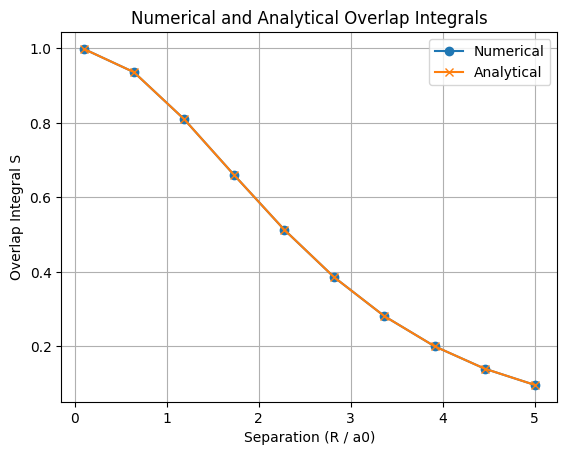

In [4]:
import numpy as np
from scipy.special import erf

# Constants
a0 = 1.0  # Bohr radius
N = 100  # Number of points in each dimension
x_min, x_max = 0, 7 * a0  # Limits for x
y_min, y_max = 0, 7 * a0  # Limits for y
z_min, z_max = 0, 7 * a0  # Limits for z
R_values = np.linspace(0.1 * a0, 5 * a0, 10)  # Separation values

# Create grid points
x = np.linspace(x_min, x_max, N)
y = np.linspace(y_min, y_max, N)
z = np.linspace(z_min, z_max, N)

# Calculate step sizes
dx = (x_max - x_min) / (N - 1)
dy = (y_max - y_min) / (N - 1)
dz = (z_max - z_min) / (N - 1)

# Function to compute numerical overlap integral using trapezoidal rule
def overlap_integral(R):
    S_sum = 0.0
    for i in range(N):
        for j in range(N):
            for k in range(N):
                r1 = np.sqrt((x[i] + R / 2) ** 2 + y[j] ** 2 + z[k] ** 2)
                r2 = np.sqrt((x[i] - R / 2) ** 2 + y[j] ** 2 + z[k] ** 2)
                weight = 1.0
                if i == 0 or i == N-1:
                    weight *= 0.5
                if j == 0 or j == N-1:
                    weight *= 0.5
                if k == 0 or k == N-1:
                    weight *= 0.5
                integrand_value = np.exp(-(r1 + r2) / a0)
                S_sum += weight * integrand_value * dx * dy * dz

    normalization_factor = 8 / (np.pi * a0**3)
    return normalization_factor * S_sum

# Function to compute analytical overlap integral
def analytical_overlap_integral(R):
    return (1 + R / a0 + R**2 / (3 * a0**2)) * np.exp(-R / a0)

# Compute numerical and analytical overlap integrals for different separations
numerical_results = []
analytical_results = []
for R in R_values:
    S_numerical = overlap_integral(R)
    S_analytical = analytical_overlap_integral(R)
    numerical_results.append(S_numerical)
    analytical_results.append(S_analytical)

# Output the results
for R, S_numerical, S_analytical in zip(R_values, numerical_results, analytical_results):
    print(f"Separation: {R/a0:.2f} a0 | Numerical: {S_numerical:.6f} | Analytical: {S_analytical:.6f}")

# Plot the results
import matplotlib.pyplot as plt

plt.plot(R_values / a0, numerical_results, 'o-', label='Numerical')
plt.plot(R_values / a0, analytical_results, 'x-', label='Analytical')
plt.xlabel('Separation (R / a0)')
plt.ylabel('Overlap Integral S')
plt.title('Numerical and Analytical Overlap Integrals')
plt.legend()
plt.grid()

plt.show()

That's pretty awesome right! Are you starting to see the power of numerical methods in chemistry? In a way, Python provides a practical lens through which we can view various mathematical aspects in chemical science.

### Hands-On Activity: Numerical Integration

Now, let's calculate the overlap integral of two He<sup>+1</sup> 1s orbitals, which are given by:

$$
\psi_{1s} = \left( \frac{2}{\pi a_0^3} \right)^{1/2} e^{-r/a_0}
$$

where $a_0$ is the Bohr radius, which is approximately 0.529 Å. The exact result is given by:

$$
S = \left( 1 + \frac{Zr}{a_0} + \frac{1}{3} \left( \frac{Zr}{a_0} \right)^2 \right) e^{-Zr/a_0}
$$

Use your new chops to solve for the overlap.

```{admonition} Wait!
:class: warning
Do you think the overlap integral will decay more slowly or more rapidly for He<sup>+1</sup> compared to H? Do particles become more or less localized as the charge increases? In other words, do particles become more classical or more quantum mechanical as the size of the nucleus increases?
```